In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd

In [3]:
x_train=pd.read_csv('/kaggle/input/titanic/train.csv')
x_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
x_test=pd.read_csv('/kaggle/input/titanic/test.csv')
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print(x_train.shape)
print(x_test.shape)

(891, 12)
(418, 11)


In [6]:
import pandas as pd

In [7]:
x_train.isna().sum()
x_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
x_train.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
print(x_train)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

In [10]:
x_train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
group=['Sex','SibSp','Pclass','Parch','Embarked']
for col in group:
      print(x_train.groupby([col])['Survived'].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [12]:
m_emb = x_train['Embarked'].mode()[0]
x_train['Embarked'].fillna(m_emb,inplace=True) 
x_train['Embarked'].isnull().sum()

/tmp/ipykernel_19/2108522463.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Embarked'].fillna(m_emb,inplace=True)


0

In [13]:
x_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [14]:
# Map 'female' to 1 and 'male' to 0
x_train['Sex'] = x_train['Sex'].map({'female': 1, 'male': 0})
print(x_train)


     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0              1         0       3    0  22.0      1      0   7.2500        S
1              2         1       1    1  38.0      1      0  71.2833        C
2              3         1       3    1  26.0      0      0   7.9250        S
3              4         1       1    1  35.0      1      0  53.1000        S
4              5         0       3    0  35.0      0      0   8.0500        S
..           ...       ...     ...  ...   ...    ...    ...      ...      ...
886          887         0       2    0  27.0      0      0  13.0000        S
887          888         1       1    1  19.0      0      0  30.0000        S
888          889         0       3    1   NaN      1      2  23.4500        S
889          890         1       1    0  26.0      0      0  30.0000        C
890          891         0       3    0  32.0      0      0   7.7500        Q

[891 rows x 9 columns]


In [15]:
x_train['SibSp']=x_train['SibSp'].map({1:1,2:1,0:0,3:0,4:0,5:0,8:0})
print(x_train)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0              1         0       3    0  22.0      1      0   7.2500        S
1              2         1       1    1  38.0      1      0  71.2833        C
2              3         1       3    1  26.0      0      0   7.9250        S
3              4         1       1    1  35.0      1      0  53.1000        S
4              5         0       3    0  35.0      0      0   8.0500        S
..           ...       ...     ...  ...   ...    ...    ...      ...      ...
886          887         0       2    0  27.0      0      0  13.0000        S
887          888         1       1    1  19.0      0      0  30.0000        S
888          889         0       3    1   NaN      1      2  23.4500        S
889          890         1       1    0  26.0      0      0  30.0000        C
890          891         0       3    0  32.0      0      0   7.7500        Q

[891 rows x 9 columns]


In [16]:
x_train['Parch']=x_train['Parch'].map({1:1,2:0,3:1,0:0,4:0,5:0,6:0})
print(x_train)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0              1         0       3    0  22.0      1      0   7.2500        S
1              2         1       1    1  38.0      1      0  71.2833        C
2              3         1       3    1  26.0      0      0   7.9250        S
3              4         1       1    1  35.0      1      0  53.1000        S
4              5         0       3    0  35.0      0      0   8.0500        S
..           ...       ...     ...  ...   ...    ...    ...      ...      ...
886          887         0       2    0  27.0      0      0  13.0000        S
887          888         1       1    1  19.0      0      0  30.0000        S
888          889         0       3    1   NaN      1      0  23.4500        S
889          890         1       1    0  26.0      0      0  30.0000        C
890          891         0       3    0  32.0      0      0   7.7500        Q

[891 rows x 9 columns]


In [17]:
x_train['Embarked']=x_train['Embarked'].map({'C':1,'Q':0,'S':0})
print(x_train)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    0  22.0      1      0   7.2500         0
1              2         1       1    1  38.0      1      0  71.2833         1
2              3         1       3    1  26.0      0      0   7.9250         0
3              4         1       1    1  35.0      1      0  53.1000         0
4              5         0       3    0  35.0      0      0   8.0500         0
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    0  27.0      0      0  13.0000         0
887          888         1       1    1  19.0      0      0  30.0000         0
888          889         0       3    1   NaN      1      0  23.4500         0
889          890         1       1    0  26.0      0      0  30.0000         1
890          891         0       3    0  32.0      0      0   7.7500         0

[891 rows x 9 columns]


In [18]:
x_train['Pclass']=x_train['Pclass'].map({1:1,2:0,3:0})
print(x_train)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       0    0  22.0      1      0   7.2500         0
1              2         1       1    1  38.0      1      0  71.2833         1
2              3         1       0    1  26.0      0      0   7.9250         0
3              4         1       1    1  35.0      1      0  53.1000         0
4              5         0       0    0  35.0      0      0   8.0500         0
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       0    0  27.0      0      0  13.0000         0
887          888         1       1    1  19.0      0      0  30.0000         0
888          889         0       0    1   NaN      1      0  23.4500         0
889          890         1       1    0  26.0      0      0  30.0000         1
890          891         0       0    0  32.0      0      0   7.7500         0

[891 rows x 9 columns]


In [19]:
mean_age = x_train['Age'].mean()
x_train['Age'].fillna(mean_age,inplace=True) 
x_train['Age'].isnull().sum()

/tmp/ipykernel_19/2130960802.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Age'].fillna(mean_age,inplace=True)


0

In [20]:
Mean_age = x_test['Age'].mean()
x_test['Age'].fillna(Mean_age,inplace=True) 
x_test['Age'].isnull().sum()

/tmp/ipykernel_19/3328460034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['Age'].fillna(Mean_age,inplace=True)


0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


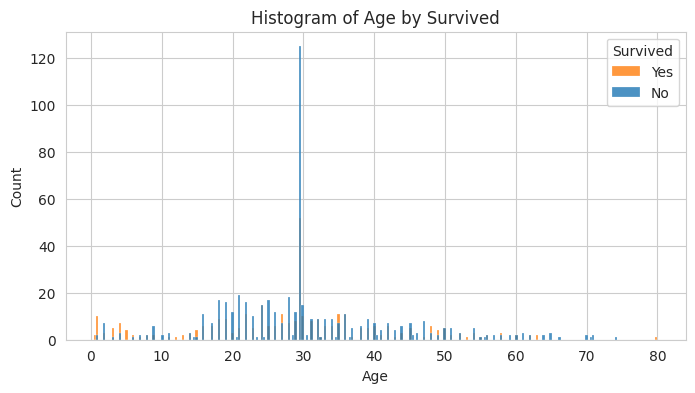

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Age histogram grouped by Survive 
# Set the style of the visualization
sns.set_style('whitegrid')

# Create a histogram of the 'Age' variable split by 'Survived'
plt.figure(figsize=(8, 4))
sns.histplot(data=x_train, x='Age', hue='Survived', bins=250, alpha=0.8)
plt.title('Histogram of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


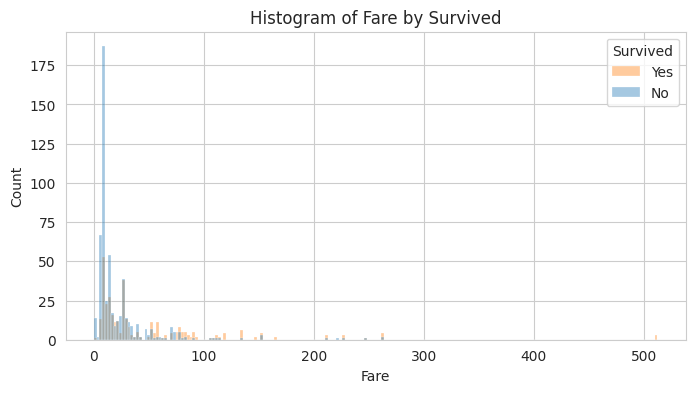

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Age histogram grouped by Survive 
# Set the style of the visualization
sns.set_style('whitegrid')

# Create a histogram of the 'Age' variable split by 'Survived'
plt.figure(figsize=(8, 4))
sns.histplot(data=x_train, x='Fare', hue='Survived', bins=200, alpha=0.4)
plt.title('Histogram of Fare by Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

In [23]:
x_train.loc[(x_train['Age'] <=15) ,'Age'] = 1
x_train.loc[(x_train['Age'] > 15), 'Age'] = 0
print(x_train['Age'].value_counts())

Age
0.0    808
1.0     83
Name: count, dtype: int64


In [24]:
x_train.loc[(x_train['Fare'] <=50) ,'Fare'] = 0
x_train.loc[(x_train['Fare'] > 50), 'Fare'] = 1
print(x_train['Fare'].value_counts())

Fare
0.0    731
1.0    160
Name: count, dtype: int64


In [25]:
x_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0,0,0.0,1,0,0.0,0
1,2,1,1,1,0.0,1,0,1.0,1
2,3,1,0,1,0.0,0,0,0.0,0
3,4,1,1,1,0.0,1,0,1.0,0
4,5,0,0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,0.0,0,0,0.0,0
887,888,1,1,1,0.0,0,0,0.0,0
888,889,0,0,1,0.0,1,0,0.0,0
889,890,1,1,0,0.0,0,0,0.0,1


In [26]:
x_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
x_test['Sex'] = x_test['Sex'].map({'female': 1, 'male': 0})

In [28]:
x_test['SibSp']=x_test['SibSp'].map({1:1,2:1,0:0,3:0,4:0,5:0,8:0})
print(x_test)

     PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    0   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2            894       2                     Myles, Mr. Thomas Francis    0   
3            895       3                              Wirz, Mr. Albert    0   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    0   
414         1306       1                  Oliva y Ocana, Dona. Fermina    1   
415         1307       3                  Saether, Mr. Simon Sivertsen    0   
416         1308       3                           Ware, Mr. Frederick    0   
417         1309       3                      Peter, Master. Michael J    0   

          Age  SibSp  Parch              Ticket    

In [29]:
x_test['Parch']=x_test['Parch'].map({1:1,2:0,3:1,0:0,4:0,5:0,6:0})
print(x_test['Parch'])

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
413    0.0
414    0.0
415    0.0
416    0.0
417    1.0
Name: Parch, Length: 418, dtype: float64


In [30]:
x_test['Embarked']=x_test['Embarked'].map({'C':1,'Q':0,'S':0})
print(x_test['Embarked'])

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int64


In [31]:
x_test['Pclass']=x_test['Pclass'].map({1:1,2:0,3:0})
print(x_test)

     PassengerId  Pclass                                          Name  Sex  \
0            892       0                              Kelly, Mr. James    0   
1            893       0              Wilkes, Mrs. James (Ellen Needs)    1   
2            894       0                     Myles, Mr. Thomas Francis    0   
3            895       0                              Wirz, Mr. Albert    0   
4            896       0  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   
..           ...     ...                                           ...  ...   
413         1305       0                            Spector, Mr. Woolf    0   
414         1306       1                  Oliva y Ocana, Dona. Fermina    1   
415         1307       0                  Saether, Mr. Simon Sivertsen    0   
416         1308       0                           Ware, Mr. Frederick    0   
417         1309       0                      Peter, Master. Michael J    0   

          Age  SibSp  Parch              Ticket    

In [32]:
mean_fare=x_test['Fare'].mean()
x_test.fillna(mean_fare,inplace=True)
x_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
x_test.loc[(x_test['Age'] <=15) ,'Age'] = 1
x_test.loc[(x_test['Age'] > 15), 'Age'] = 0
print(x_test['Age'].value_counts())

Age
0.0    386
1.0     32
Name: count, dtype: int64


In [34]:
x_test.loc[(x_test['Fare'] <=50) ,'Fare'] = 0
x_test.loc[(x_test['Fare'] > 50), 'Fare'] = 1
print(x_test['Fare'].value_counts())

Fare
0.0    338
1.0     80
Name: count, dtype: int64


In [35]:
x_test.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
print(x_test)

     PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0            892       0    0  0.0      0    0.0   0.0         0
1            893       0    1  0.0      1    0.0   0.0         0
2            894       0    0  0.0      0    0.0   0.0         0
3            895       0    0  0.0      0    0.0   0.0         0
4            896       0    1  0.0      1    1.0   0.0         0
..           ...     ...  ...  ...    ...    ...   ...       ...
413         1305       0    0  0.0      0    0.0   0.0         0
414         1306       1    1  0.0      0    0.0   1.0         1
415         1307       0    0  0.0      0    0.0   0.0         0
416         1308       0    0  0.0      0    0.0   0.0         0
417         1309       0    0  0.0      1    1.0   0.0         1

[418 rows x 8 columns]


In [36]:
x_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [37]:
x_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,0,0.0,0,0.0,0.0,0
1,893,0,1,0.0,1,0.0,0.0,0
2,894,0,0,0.0,0,0.0,0.0,0
3,895,0,0,0.0,0,0.0,0.0,0
4,896,0,1,0.0,1,1.0,0.0,0
...,...,...,...,...,...,...,...,...
413,1305,0,0,0.0,0,0.0,0.0,0
414,1306,1,1,0.0,0,0.0,1.0,1
415,1307,0,0,0.0,0,0.0,0.0,0
416,1308,0,0,0.0,0,0.0,0.0,0


In [38]:
X_ = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X=x_train[X_]
Y=x_train['Survived']
X_test=x_test.drop(['PassengerId'],axis=1)

In [39]:
split_ratio = 0.8
split_index = int(split_ratio*len(X))
x_train,x_val=X[:split_index],X[split_index:]
y_train,y_val=Y[:split_index],Y[split_index:]
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError,BinaryCrossentropy

2024-04-03 04:49:57.865876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 04:49:57.866062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 04:49:58.032592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [41]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7057 - loss: 0.6778 - val_accuracy: 0.7877 - val_loss: 0.6198
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.5954 - val_accuracy: 0.7933 - val_loss: 0.5333
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7754 - loss: 0.5204 - val_accuracy: 0.7989 - val_loss: 0.4477
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7799 - loss: 0.4757 - val_accuracy: 0.8156 - val_loss: 0.4190
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8026 - loss: 0.4502 - val_accuracy: 0.8212 - val_loss: 0.4157
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7884 - loss: 0.4551 - val_accuracy: 0.7933 - val_loss: 0.4158
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8236 - loss: 0.4294 - val_accuracy: 0.7933 - val_loss: 0.4148
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8111 - loss: 0.4344 - val_accuracy: 0.7933 - val_loss

In [45]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print('\nTest accuracy:', val_acc)

6/6 - 0s - 5ms/step - accuracy: 0.7989 - loss: 0.4126

Test accuracy: 0.7988826632499695


In [46]:
y_pred=model.predict(X_test)
print(y_pred.shape)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
(418, 1)


In [47]:
y_pred=(y_pred>0.5).astype(int).ravel()
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
passenger_ids = x_test['PassengerId']
y_pred_df= pd.DataFrame(y_pred, columns=['survived'])
y_pred = y_pred_df['survived']
result = pd.DataFrame({'PassengerId':passenger_ids, 'Survived':y_pred})
print(result)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [49]:
result.to_csv('submission.csv',index=False)